# Titanic Data Visualization
> Sulthan Abiyyu Hakim | 17 Oktober 2021

In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Catatan**
Korelasi yang menarik:
- Korelasi antara umur dan tingkat survivalitas
- Korelasi antara gender dan tingkat survivalitas
- Korelasi antara class dan tingkat survivalitas
- Korelasi antara cabin dan tingkat survivalitas

Variabel bebas:
- Umur
- Gender
- Class
- Cabin

Variabel terikat:
- Tingkat survivalitas

Variabel kontrol:
- Tragedi yang sama

## Korelasi antara umur dan tingkat survivalitas

In [115]:
# Mencari umur penumpang yang selamat paling banyak
df[df["Survived"]==1].groupby("Age")["Survived"].count().sort_values(ascending=False).head()

Age
24.0    15
36.0    11
35.0    11
27.0    11
22.0    11
Name: Survived, dtype: int64

In [116]:
# Mencari presentase penumpang selamat berdasarkan total umur masing-masing
(((df[df["Survived"]==1].groupby("Age")["Survived"].count())/(df[df["Survived"]==0].groupby("Age")["Survived"].count()+df[df["Survived"]==1].groupby("Age")["Survived"].count()))).sort_values(ascending=False).head()

Age
3.0     0.833333
15.0    0.800000
1.0     0.714286
4.0     0.700000
6.0     0.666667
Name: Survived, dtype: float64

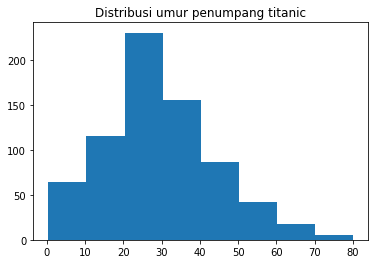

In [117]:
plt.hist(df["Age"], bins=8)
plt.title("Distribusi umur penumpang titanic")
plt.show()

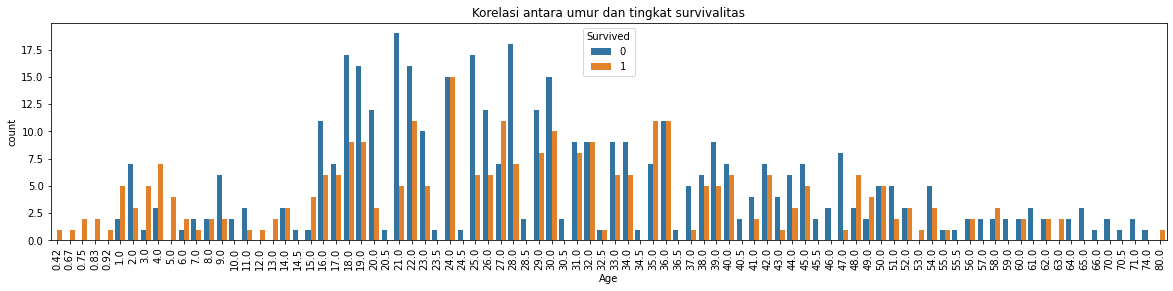

In [118]:
plt.figure(figsize=[20,4])
g=sns.countplot(x="Age",data=df, hue="Survived")
g.set_title("Korelasi antara umur dan tingkat survivalitas")
plt.xticks(rotation=90)
plt.show()

## Korelasi antara gender dan tingkat survivalitas

In [132]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
# Total penumpang laki-laki dan perempuan
df.groupby("Sex")["Name"].count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [133]:
# Mencari gender penumpang yang selamat paling banyak
df[df["Survived"]==1].groupby("Sex")["Survived"].count().sort_values(ascending=False).head()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [158]:
# Mencari presentase penumpang selamat berdasarkan total gender masing-masing
(((df[df["Survived"]==1].groupby("Sex")["Survived"].count())/(df[df["Survived"]==0].groupby("Sex")["Survived"].count()+df[df["Survived"]==1].groupby("Sex")["Survived"].count()))).sort_values(ascending=False).head()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

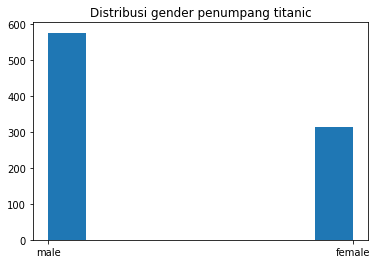

In [157]:
plt.hist(df["Sex"], bins=8)
plt.title("Distribusi gender penumpang titanic")
plt.show()

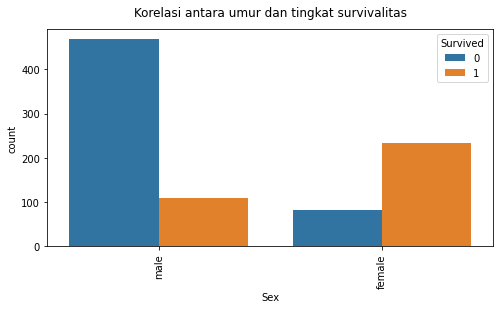

In [163]:
plt.figure(figsize=[8,4])
g=sns.countplot(x="Sex",data=df, hue="Survived")
g.set_title("Korelasi antara umur dan tingkat survivalitas", y=1.03)
plt.xticks(rotation=90)
plt.show()

## Korelasi antara class dan tingkat survivalitas

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
# Mencari class penumpang yang selamat paling banyak
df[df["Survived"]==1].groupby("Pclass")["Survived"].count().sort_values(ascending=False).head()

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64

In [167]:
# Mencari presentase penumpang selamat berdasarkan class masing-masing
(((df[df["Survived"]==1].groupby("Pclass")["Survived"].count())/(df[df["Survived"]==0].groupby("Pclass")["Survived"].count()+df[df["Survived"]==1].groupby("Pclass")["Survived"].count()))).sort_values(ascending=False).head()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

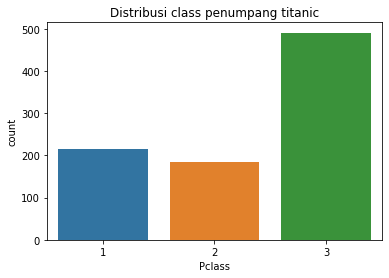

In [174]:
sns.countplot(x=df["Pclass"])
plt.title("Distribusi class penumpang titanic")
plt.show()

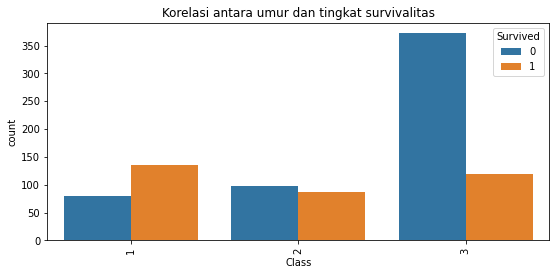

In [180]:
plt.figure(figsize=[9,4])
g=sns.countplot(x="Pclass",data=df, hue="Survived")
g.set_title("Korelasi antara class dan tingkat survivalitas")
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.show()

## Korelasi antara cabin dan tingkat survivalitas

In [182]:
# Mencari cabin penumpang yang selamat paling banyak
df[df["Survived"]==1].groupby("Cabin")["Survived"].count().sort_values(ascending=False).head()

Cabin
B96 B98    4
F33        3
E101       3
G6         2
C126       2
Name: Survived, dtype: int64

In [184]:
# Mencari presentase penumpang selamat berdasarkan total Cabin masing-masing
(((df[df["Survived"]==1].groupby("Cabin")["Survived"].count())/(df[df["Survived"]==0].groupby("Cabin")["Survived"].count()+df[df["Survived"]==1].groupby("Cabin")["Survived"].count()))).sort_values(ascending=False).head()

Cabin
D              0.666667
F2             0.666667
B22            0.500000
B51 B53 B55    0.500000
B58 B60        0.500000
Name: Survived, dtype: float64

## Kesimpulan

1. Anak berumur 3 tahun memiliki presentase selamat tertinggi karena kemungkinan saat evakuasi anak kecil didahulukan terlebih dahulu dan jumlah total dari anak 3 tahun cenderung sedikit.
2. Wanita memiliki presentase selamat paling besar karena kemungkinan saat evakuasi wanita lebih didahulukan dibanding pria.
3. Penumpang dengan class 1 memiliki presentase selamat tertinggi karena mungkin karena ini adalah kelas paling mewah dan lebih di prioritaskan atau bisa jadi posisinya lebih memungkinkan untuk menyelamatkan diri.
4. Cabin D memiliki presentase selamat paling tinggi karena menurut denah, cabin D adalah salah satu tempat gerbang keluar saat proses evakuasi.

Jadi, anak kecil dan wanita yang berada dekat cabin D dan merupakan penumpang class 1 adalah yang paling besar kemungkinannya untuk selamat dari peristiwa Titanic.